# Matrices, normas y eigenvalores/eigenvectores.

**Objetivo.**

Revisar e ilustrar los conceptos de matrices, sus normas y eigenvalores/eigenvectores usando la biblioteca `numpy`.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Algebra_Lineal_01">MACTI-Algebra_Lineal_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922

In [1]:
# Importamos las bibliotecas requeridas
import numpy as np
import sympy
import ipywidgets as widgets
import macti.visual as mvis
import macti.matem as mmat


Sea $A = a_{ij}$ una matriz de $n \times n$, donde $n$ indica la dimensión de la matriz ($n$ renglones por $n$ columnas). Los números $a_{ij}$ son los elementos de la matriz, y $i,j = 1,\dots,n$. La matriz $A^T = {a_{ji}}$ es la matriz transpuesta.

$$
A = 
\left(
\begin{array}{cccc}
a_{11} & a_{12} & \dots & a_{1n}\\
a_{21} & a_{22} & \dots & a_{2n}\\
\vdots & \vdots& \ddots & \vdots \\
a_{n1} & a_{n2} & \dots & a_{nn}\\
\end{array}
\right)
\,\,\,\,
A^T = 
\left(
\begin{array}{cccc}
a_{11} & a_{21} & \dots & a_{n1}\\
a_{12} & a_{22} & \dots & a_{n2}\\
\vdots & \vdots& \ddots & \vdots \\
a_{1n} & a_{2n} & \dots & a_{nn}\\
\end{array}
\right)
$$

Definamos una matriz usando `numpy`:

In [2]:
A = np.array([[2, 3, 5],
              [1, -4, 8],
              [8, 6, 3]])
A

array([[ 2,  3,  5],
       [ 1, -4,  8],
       [ 8,  6,  3]])

## Matriz transpuesta
La matriz $A^T = {a_{ji}}$ es la matriz transpuesta.

In [3]:
AT = A.T
AT

array([[ 2,  1,  8],
       [ 3, -4,  6],
       [ 5,  8,  3]])

## Matriz identidad
La matriz identidad $I$ es aquella donde todas sus entradas son cero excepto en la diagonal donde sus entradas son 1.

In [4]:
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Matriz inversa
La matriz inversa de $A$ se denota por $A^{-1}$ y es tal que $A^{-1}A = I$.

In [5]:
Ainv = np.linalg.inv(A)
Ainv

array([[-0.23715415,  0.08300395,  0.17391304],
       [ 0.24110672, -0.13438735, -0.04347826],
       [ 0.15019763,  0.04743083, -0.04347826]])

In [6]:
# Comprobar que Ainv es la inversa de A
np.dot(A, Ainv)

array([[1.00000000e+00, 0.00000000e+00, 2.77555756e-17],
       [2.22044605e-16, 1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 2.77555756e-17, 1.00000000e+00]])

## Matriz diagonal
Una matriz $A = {a_{ij}}$ se llama diagonal si $a_{ij}=0, \forall i \ne j$ y se denota por $A = \mbox{diag}$ ${a_{ii}}$.

In [7]:
A

array([[ 2,  3,  5],
       [ 1, -4,  8],
       [ 8,  6,  3]])

In [8]:
np.diagonal(A)

array([ 2, -4,  3])

In [9]:
# Diagonales inferiores
np.diagonal(A,1)

array([3, 8])

In [10]:
# Diagonales superiores
np.diagonal(A,-1)

array([1, 6])

## Matriz triangular superior e inferior
Una matriz $A = {a_{ij}}$ se llama triangular superior si $a_{ij} = 0, \forall i > j$ y triangular inferior si $a_{ij} = 0, \forall i < j$.

In [11]:
# Matriz triangular superior
np.triu(A)

array([[ 2,  3,  5],
       [ 0, -4,  8],
       [ 0,  0,  3]])

In [12]:
# Matriz triangular inferior
np.tril(A)

array([[ 2,  0,  0],
       [ 1, -4,  0],
       [ 8,  6,  3]])

## Matrices simétricas
Una matriz $A$ es simétrica si $A^T = A$ y antisimétrica si $A^T = -A$.

In [13]:
B = np.array([[2, 3, 5],
              [3, -4, 8],
              [5, 8, 3]])

In [14]:
print('Matriz A = \n{} \n\nMatriz B = \n{}'.format(A,B))

Matriz A = 
[[ 2  3  5]
 [ 1 -4  8]
 [ 8  6  3]] 

Matriz B = 
[[ 2  3  5]
 [ 3 -4  8]
 [ 5  8  3]]


In [15]:
# Función para checar si una matriz es simétrica
isSymmetric = lambda mat: np.array_equal(mat, mat.T)

In [16]:
isSymmetric(B)

True

In [17]:
isSymmetric(A)

False

## Matriz ortogonal
Una matriz $A$ es ortogonal si $A^T A = I$, o equivalentemente $A^T = A^{-1}$.

La [matriz rotación](https://es.wikipedia.org/wiki/Matriz_de_rotaci%C3%B3n) en 2D es una matriz ortogonal y se define como sigue:

$$
R(\theta )=
\begin{bmatrix}
\cos \theta &-\sin \theta \\
\sin \theta & \cos \theta \\
\end{bmatrix}
$$

In [18]:
theta = sympy.symbols('theta')

# Matriz rotación
R = sympy.Matrix([[sympy.cos(theta), -sympy.sin(theta)],
                  [sympy.sin(theta), sympy.cos(theta)]])
R

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

Verifiquemos que cumple con las propiedades de una matriz ortogonal.

In [19]:
R.T

Matrix([
[ cos(theta), sin(theta)],
[-sin(theta), cos(theta)]])

In [20]:
R * R.T

Matrix([
[sin(theta)**2 + cos(theta)**2,                             0],
[                            0, sin(theta)**2 + cos(theta)**2]])

In [21]:
sympy.simplify(R * R.T)

Matrix([
[1, 0],
[0, 1]])

Esta matriz rota un vector por un cierto número de grados, veamos:

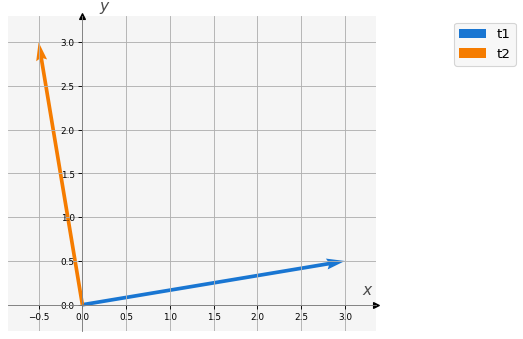

In [22]:
angulo = 90 # ángulo de rotación

# Vector a rotar
t1 = sympy.Matrix([3, 0.5])

# Rotación usando la matriz R
t2 = R.subs('theta', angulo * np.pi / 180).evalf(14) * t1

# Transformación a arreglos de numpy
nt1 = np.array(t1, dtype=float).reshape(2,)
nt2 = np.array(t2, dtype=float).reshape(2,)

# Visualizamos los vectores.
v = mvis.Plotter()  # Definición de un objeto para crear figuras.
v.set_coordsys(1)   # Definición del sistema de coordenadas.
v.plot_vectors(1, [nt1, nt2], ['t1', 't2'], ofx=-0.1) # Graficación de los vectores 'x' y 'y'.
v.grid()  # Muestra la rejilla del sistema de coordenadas.

Cada par de renglones o de columnas de una matriz ortogonal, son ortogonales entre sí. Además la longitud de cada columna o renglón es igual a 1.

In [23]:
# Definimos una matriz ortogonal
C = np.array([[1/3, 2/3, -2/3],
              [-2/3, 2/3, 1/3],
              [2/3, 1/3, 2/3]])

In [24]:
# Verificamos que es ortogonal
np.dot(C, C.T)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [25]:
# Verificamos ortogonalidad entre renglones
np.dot(C[0], C[1])

0.0

In [26]:
# Verificamos ortogonalidad entre columnas
np.dot(C[:,0], C[:,1])

0.0

In [27]:
# Verificamos la norma de los renglones
np.linalg.norm(C[2])

1.0

In [28]:
# Verificamos la norma de las columnas
np.linalg.norm(C[2])

1.0

## Matriz transpuesta conjugada
La matriz $A^*$ representa a la matriz $A$ transpuesta y conjugada. La matriz $A^* = {\bar{a}_{ji}}$ se llama también la adjunta de $A$.

In [29]:
# Creación de una matriz con valores complejos
real = np.arange(1,10).reshape(3,3)
imag = np.arange(1,10).reshape(3,3)
C =  real + imag *1.0j
C

array([[1.+1.j, 2.+2.j, 3.+3.j],
       [4.+4.j, 5.+5.j, 6.+6.j],
       [7.+7.j, 8.+8.j, 9.+9.j]])

In [30]:
# Transpuesta conjugada
C.conj().T

array([[1.-1.j, 4.-4.j, 7.-7.j],
       [2.-2.j, 5.-5.j, 8.-8.j],
       [3.-3.j, 6.-6.j, 9.-9.j]])

## Matriz definida positiva

Una matriz $A$ se denomina **positiva definida** si $\langle A\vec{x}, \vec{x}\rangle = \vec{x}^T A\vec{x} > 0$ para cualquier vector no nulo $\vec{x}$ de $\mathbb{R}^n$. 

La matriz se llama **positiva semidefinida** si $\vec{x}^T A\vec{x} \ge 0$ para cualquier vector $\vec{x}$ de $\mathbb{R}^n$. 

Recordemos que:
$$
\vec{x}^T A\vec{x} = \sum_{i=1}^n \sum_{j=1}^n a_{ij} x_i x_j
$$

<div class="alert alert-info">

## **Ejemplo 1.**

<font color="Black">
Las siguientes dos rectas se cruzan en algún punto.

$$
\begin{array}{ccc}
3x + 2y & = &2 \\
2x + 6y & = &-8
\end{array}
$$

En términos de un sistema lineal, las dos ecuaciones anteriores se escriben como sigue:

$$
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{c}
x \\
y
\end{array} \right] =
\left[
\begin{array}{c}
2 \\ 
-8
\end{array} \right]
\tag{1}
$$

Podemos calcular $\vec{x}^T A\vec{x}$ para este ejemplo como sigue:    
</font>
</div>

In [31]:
# Usaremos sympy.
# Primero definimos los símbolos
x, y = sympy.symbols('x y')

# Construimos el vector de incógnitas
X = sympy.Matrix([x, y])
print(X)

# Construimos la matriz
A = sympy.Matrix([[3.0, 2.0], [2.0, 6.0]])
print(A)

Matrix([[x], [y]])
Matrix([[3.00000000000000, 2.00000000000000], [2.00000000000000, 6.00000000000000]])


In [32]:
# Calculamos xT * A * x
pos_def = X.T @ A @ X
pos_def

Matrix([[x*(3.0*x + 2.0*y) + y*(2.0*x + 6.0*y)]])

In [33]:
# Simplificamos
f = sympy.simplify(pos_def)
f

Matrix([[3.0*x**2 + 4.0*x*y + 6.0*y**2]])

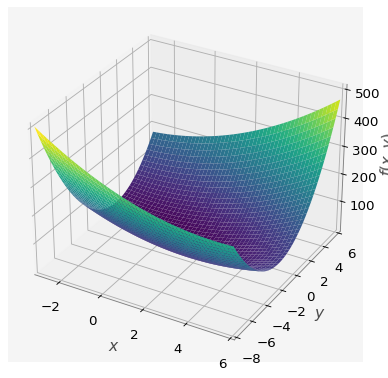

In [34]:
# Graficamos
sympy.plotting.plot3d(f[0], (x, -3, 6), (y, -8, 6))

Observa que se obtiene una función cuadrática cuya gráfica es un paraboloide orientado hacia arriba. Esta es una característica de las matrices definidas positivas. 


<div class="alert alert-success">

## **Ejercicio 1.**

<font color="Black"> 
Determinar si en el siguiente sistema de ecuaciones se tiene una matriz definida positiva:
$$
\begin{array}{ccc}
y & = & 0.10 x + 200 \\
y & = & 0.30 x + 20
\end{array}
$$

Sistema lineal.

$$
\left[
\begin{array}{cc}
0.10 & -1 \\
0.30 & -1
\end{array} \right]
\left[
\begin{array}{c}
x \\
y
\end{array} \right] =
\left[
\begin{array}{c}
-200 \\ 
-20
\end{array} \right] \tag{2}
$$

Guarda tu respuesta en la variable `respuesta = 'SI'` si la matriz es definida positiva o `respuesta =  'NO'` en caso contrario.
    
**Hint**: Utilizar el mismo código del ejemplo 1 y modificarlo de acuerdo al ejercicio planteado. Observa cómo sale la gráfica y responde la pregunta. Para un mejor resultado, utiliza valores muy grandes y muy chicos en los rangos de $x$ y $y$ al momento de graficar ( > 2000).
</font>

</div>

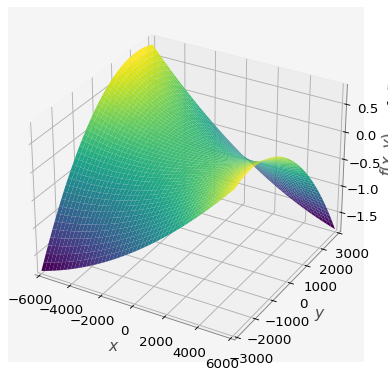

In [35]:
# B = sympy.Matrix(...)
# pos_def_B = ...
# fB = ...
# sympy.plotting.plot3D( ...)

### BEGIN SOLUTION
B = sympy.Matrix([[0.10, -1.0], [0.30, -1.0]])

pos_indef_B = X.T @ B @ X
fB = sympy.simplify(pos_indef_B)
sympy.plotting.plot3d(fB[0], (x, -6000, 6000), (y, -3000, 3000))
### END SOLUTION

# respuesta = ...

## Eigenvalores y Eigenvectores

Si $A$ es una matriz cuadrada, entonces definimos el número $\lambda$ (real o complejo) como **autovalor** (**valor propio** o **eigenvalor**) de $A$ si $A\vec{u} = \lambda \vec{u}$, o equivalentemente si $det(A - \lambda I) = 0$. El vector $\vec{u}$ se llama autovector (vector propio o eigenvector) de $A$. El conjunto de todos los autovalores de la matriz $A$ se denomina espectro de $A$ y se denota como $\rho(A)$.

In [36]:
# Convertimos la matriz A a un arreglo de numpy
A = np.array(A, dtype=float)
A

array([[3., 2.],
       [2., 6.]])

<div class="alert alert-info">

Los eigenvalores y eigenvectores se pueden calcular usando la función `np.linalg.eig()}` `de numpy` como sigue:
</div>

In [37]:
np.linalg.eig(A)  # w: eigenvalues, v: eigenvectors

EigResult(eigenvalues=array([2., 7.]), eigenvectors=array([[-0.89442719, -0.4472136 ],
       [ 0.4472136 , -0.89442719]]))

<div class="alert alert-info">

También podemos usar la función `macti.matem.eigen_land()` para obtener mayor información de los eigenvalores y eigenvectores como sigue:
</div>

In [38]:
wA, vA = mmat.eigen_land(A)

eigenvalores = [2. 7.]
eigenvectores:
 [-0.89442719  0.4472136 ] 
 [-0.4472136  -0.89442719]
ángulo entre eigenvectores = 90.0


Podemos graficar los eigenvectores:

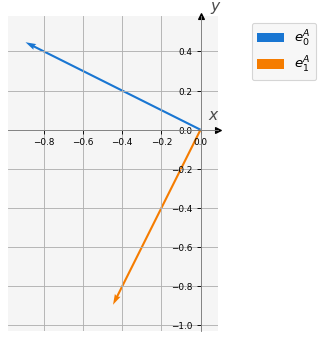

In [39]:
v = mvis.Plotter()
v.set_coordsys()
v.plot_vectors(1, [vA[:,0], vA[:,1]], ['$e_0^A$','$e_1^A$'])
v.grid()

<div class="alert alert-info">

Observa que en este caso los eigenvectores son ortogonales.

La relación 

$$
A \vec{u} = \lambda \vec{u}
$$

indica básicamente que al aplicar la matriz $A$ a un eigenvector $\vec{u}$, el resultado es el mismo vector escalado $\lambda \vec{u}$, es decir no lo rota. Cualquier otro vector, que no sea un múltiplo de los eigenvectores, será rotado. Veamos esto en el siguiente código:
</div>

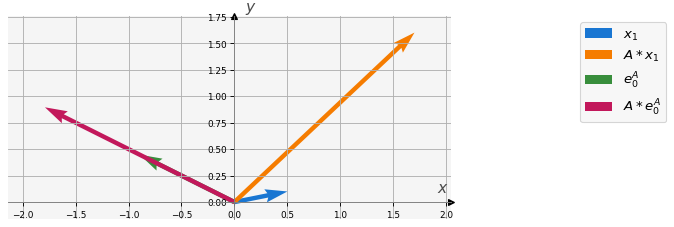

In [40]:
# definimos un vector
x1 = np.array([0.5,0.1])

# Aplicamos la matriz A
r1 = A @ x1

# Ahora graficamos
v = mvis.Plotter()
v.set_coordsys()
v.plot_vectors(1, [x1, r1, vA[:,0], A @ vA[:,0]], 
                  ['$x_1$', '$A * x_1$', '$e_0^A$', '$A * e_0^A$'])
v.grid()

Observamos que el eigenvectpr $e_0^A$ no rota cuando se le aplica $A$, pero el vector $\vec{x}_1$ si es rotado un cierto ángulo cuando le aplicamos la matriz $A$.

## Normas Matriciales.

La norma de una matriz $A$ es un número real positivo denotado por $||A||$.
Dadas cualesquiera dos matrices $A$ y $B$ se cumplen los siguiente axiomas.
1. $||A|| \ge 0$.
2. $||A|| = 0 \iff A = 0$.
3. $||aA|| = |a| ||A||$ para cualquier número real $a$.
4. $||A+B|| \le ||A|| + ||B||$ (desigualdad triangular).
5. $||AB|| \le ||A||||B||$ (compatibilidad).

Definimos la siguiente matriz

$$
M =
\begin{bmatrix}
-3 & 2 \\
1 & -5
\end{bmatrix}
$$


In [41]:
M = np.array([[-3, 2],[1, -5]])
M

array([[-3,  2],
       [ 1, -5]])

### Norma 1.
Consiste en sumar los valores absolutos de los elementos de cada **columna** y luego calular 
la suma máxima:
$$
||A||_1 = \max_{1 \le j \le n} \left( \sum_{i=1}^n  |a_{ij}| \right)
$$

In [42]:
np.linalg.norm(M,1)

7.0

### Norma $\infty$.
Consiste en sumar los valores absolutos de los elementos de cada **renglón** y luego calular 
la suma máxima:
$$
||A||_\infty = \max_{1 \le i \le n} \left( \sum_{j=1}^n  |a_{ij}| \right)
$$

In [43]:
np.linalg.norm(M, np.infty)

6.0

### Norma de Frobenius

$$
||A||_F = \left( \sum_{i=1}^n \sum_{j=1}^n |a_{ij}|^2 \right)^{1/2}
$$

In [44]:
np.linalg.norm(M, 'fro')

6.244997998398398

<div class="alert alert-info">

## **Ejemplo 2.**

<font color="Black">Verificar que se cumplen los 5 axiomas de las normas matriciales para la Norma 1 usando la matriz $M$.</font>
</div>

**Propiedad 1**. $||M||_1 \geq 0$

In [45]:
M_n1 = np.linalg.norm(M,1 )
print('M =\n {}'.format(M))
print('∥M∥₁ = {}'.format(M_n1))

M =
 [[-3  2]
 [ 1 -5]]
∥M∥₁ = 7.0


**Propiedad 2.** 

In [46]:
ZERO = np.array([[0.0, 0.0], [0.0, 0.0]])
ZERO_n1 = np.linalg.norm(ZERO,1)
print('ZERO = \n{}'.format(ZERO))
print('∥ZERO∥₁ = {}'.format(ZERO_n1))

ZERO = 
[[0. 0.]
 [0. 0.]]
∥ZERO∥₁ = 0.0


**Propiedad 3.**

In [47]:
a = -3.5
a_M_n1 = np.linalg.norm(a * M, 1) 
print('∥M∥₁ = {}, \t a = {}'.format(M_n1, a))
print('\n ∥a * M∥₁ = {} \n |a| * ∥M∥₁ = {}'.format(a_M_n1, np.abs(a) * M_n1))

∥M∥₁ = 7.0, 	 a = -3.5

 ∥a * M∥₁ = 24.5 
 |a| * ∥M∥₁ = 24.5


**Propiedad 4.**

In [48]:
N = np.arange(4).reshape(2,2)

M_p_N_n1= np.linalg.norm(M + N, 1)

N_n1 = np.linalg.norm(N, 1)

print('\nNorma 1:')
print(' ∥M + N∥₁ = {}'.format(M_p_N_n1))
print(' ∥M∥₁ + ∥N∥₁ = {}'.format(M_n1 + N_n1))
print(' ¿ ∥M + N∥₁ ≤ ∥M∥₁ + ∥N∥₁ ? : {}'.format(M_p_N_n1 <= M_n1 + N_n1))


Norma 1:
 ∥M + N∥₁ = 6.0
 ∥M∥₁ + ∥N∥₁ = 11.0
 ¿ ∥M + N∥₁ ≤ ∥M∥₁ + ∥N∥₁ ? : True


**Propiedad 5.**

In [49]:
M_x_N_n1= np.linalg.norm(M * N, 1)

print('\nNorma 1:')
print(' ∥M * N∥₁ = {}'.format(M_x_N_n1))
print(' ∥M∥₁ * ∥N∥₁ = {}'.format(M_n1 * N_n1))
print(' ¿ ∥M * N∥₁ ≤ ∥M∥₁ * ∥N∥₁ ? : {}'.format(M_x_N_n1 <= M_n1 * N_n1))


Norma 1:
 ∥M * N∥₁ = 17.0
 ∥M∥₁ * ∥N∥₁ = 28.0
 ¿ ∥M * N∥₁ ≤ ∥M∥₁ * ∥N∥₁ ? : True


<div class="alert alert-success">

## **Ejercicio 2.**

<font color="Black"> Verificar se cumplen los axiomas de las normas para $||\cdot||_F$ usando la matriz $M$.</font>

</div>

**Propiedad 1.**

<div class="alert alert-info">

El resultado debería ser:

```
M =
 [[-3  2]
 [ 1 -5]]
∥M∥F = 6.244997998398398
```
</div>

In [50]:
### BEGIN SOLUTION
M_nF = np.linalg.norm(M,'fro')
print('M =\n {}'.format(M))
print('∥M∥F = {}'.format(M_nF))
### END SOLUTION

M =
 [[-3  2]
 [ 1 -5]]
∥M∥F = 6.244997998398398


**Propiedad 2.**

<div class="alert alert-info">

El resultado debería ser:

```
ZERO = 
[[0. 0.]
 [0. 0.]]
∥ZERO∥F = 0.0
```
</div>

In [51]:
### BEGIN SOLUTION
ZERO_nF = np.linalg.norm(ZERO,'fro')
print('ZERO = \n{}'.format(ZERO))
print('∥ZERO∥F = {}'.format(ZERO_nF))
### END SOLUTION

ZERO = 
[[0. 0.]
 [0. 0.]]
∥ZERO∥F = 0.0


**Propiedad 3.**

<div class="alert alert-info">

El resultado debería ser:

```
∥M∥F = 6.244997998398398, 	 a = -3.5

 ∥a * M∥F = 21.857492994394395 
 |a| * ∥M∥F = 21.857492994394395
```
</div>

In [52]:
### BEGIN SOLUTION
a = -3.5
a_M_nF = np.linalg.norm(a * M, 'fro') 
print('∥M∥F = {}, \t a = {}'.format(M_nF, a))
print('\n ∥a * M∥F = {} \n |a| * ∥M∥F = {}'.format(a_M_nF, np.abs(a) * M_nF))
### END SOLUTION

∥M∥F = 6.244997998398398, 	 a = -3.5

 ∥a * M∥F = 21.857492994394395 
 |a| * ∥M∥F = 21.857492994394395


**Propiedad 4.**

<div class="alert alert-info">

El resultado debería ser:

```
Norma de Frobenius:
 ∥M + N∥F = 5.5677643628300215
 ∥M∥F + ∥N∥F = 9.98665538517234
 ¿ ∥M + N∥F ≤ ∥M∥F + ∥N∥F ? : True
```
</div>

In [53]:
### BEGIN SOLUTION
N = np.arange(4).reshape(2,2)

M_p_N_nF= np.linalg.norm(M + N, 'fro')

N_nF = np.linalg.norm(N, 'fro')

print('\nNorma de Frobenius:')
print(' ∥M + N∥F = {}'.format(M_p_N_nF))
print(' ∥M∥F + ∥N∥F = {}'.format(M_nF + N_nF))
print(' ¿ ∥M + N∥F ≤ ∥M∥F + ∥N∥F ? : {}'.format(M_p_N_nF <= M_nF + N_nF))
### END SOLUTION


Norma de Frobenius:
 ∥M + N∥F = 5.5677643628300215
 ∥M∥F + ∥N∥F = 9.98665538517234
 ¿ ∥M + N∥F ≤ ∥M∥F + ∥N∥F ? : True


**Propiedad 5.**

<div class="alert alert-info">

El resultado debería ser:

```
Norma de Frobenius:
 ∥M * N∥F = 15.264337522473747
 ∥M∥F * ∥N∥F = 23.366642891095847
 ¿ ∥M * N∥F ≤ ∥M∥F * ∥N∥F ? : True
```
</div>

In [54]:
### BEGIN SOLUTION
M_x_N_nF= np.linalg.norm(M * N, 'fro')

print('\nNorma de Frobenius:')
print(' ∥M * N∥F = {}'.format(M_x_N_nF))
print(' ∥M∥F * ∥N∥F = {}'.format(M_nF * N_nF))
print(' ¿ ∥M * N∥F ≤ ∥M∥F * ∥N∥F ? : {}'.format(M_x_N_nF <= M_nF * N_nF))
### END SOLUTION


Norma de Frobenius:
 ∥M * N∥F = 15.264337522473747
 ∥M∥F * ∥N∥F = 23.366642891095847
 ¿ ∥M * N∥F ≤ ∥M∥F * ∥N∥F ? : True


### Número de condición

El número de condición de una matriz $A$ se define como

$$
\kappa(A) = ||A|| \; ||A^{-1}||
$$

Este número siempre es más grande o igual a 1. Además nos da información 
acerca de que tan bien o mal está definido un problema que depende de la matriz en cuestión.
Entre más grande sea este número es más difícil de resolver el problema.

In [55]:
A = np.array([[3., 2.],[2., 6.]])
print(A)
# Calculamos el número de condición usando funciones de numpy
kA_F = np.linalg.norm(A, 'fro') * np.linalg.norm(np.linalg.inv(A), 'fro')
print('𝜅(A) = {}'.format(kA_F))

[[3. 2.]
 [2. 6.]]
𝜅(A) = 3.7857142857142847


In [56]:
# Existe una función para calcular el número de condición directamente
kA_F = np.linalg.cond(A, 'fro')
print('𝜅(A) = {}'.format(kA_F))

𝜅(A) = 3.7857142857142847


In [57]:
# Matriz con un número de condición más grande
B = np.array([[0.10, -1],[0.30, -1]])
kB_F = np.linalg.cond(B, 'fro')
print(B)
print('𝜅(B) = {}'.format(kB_F))

[[ 0.1 -1. ]
 [ 0.3 -1. ]]
𝜅(B) = 10.5


In [58]:
# Matriz mal condicionada
C = np.array([[0.10, -1000],[0.30, -1]])
kC_F = np.linalg.cond(C, 'fro')
print(C)
print('𝜅(C) = {}'.format(kC_F))

[[ 1.e-01 -1.e+03]
 [ 3.e-01 -1.e+00]]
𝜅(C) = 3334.448482827609


<div class="alert alert-success">

## **Ejercicio 3.**

<font color="Black"> Calcula el número de condición para las matrices $A$, $B$ y $C$ usando las normas 1 y 2. Utiliza la función `print()` de tal manera que obtengas una salida similar a la siguiente:

```
Número de condición con la norma 1:
 𝜅(A) = ...
 𝜅(B) = ...
 𝜅(C) = ...
Número de condición con la norma 2:
 𝜅(A) = ... 
 𝜅(B) = ...
 𝜅(C) = ...
```
</font>

</div>

In [59]:
# Con la norma 1
# kA_1 = ...
# ...
# print('Número ...)
# print('𝜅(A) = {}, ...)

# Con la norma 2
# ...

### BEGIN SOLUTION
# Usando la norma 1
kA_1 = np.linalg.cond(A, 1)
kB_1 = np.linalg.cond(B, 1)
kC_1 = np.linalg.cond(C, 1)
print('Número de condición con la norma 1:')
print(' 𝜅(A) = {} \n 𝜅(B) = {}\n 𝜅(C) = {}'.format(kA_1, kB_1, kC_1))

# Usando la norma 2
kA_2 = np.linalg.cond(A, 2)
kB_2 = np.linalg.cond(B, 2)
kC_2 = np.linalg.cond(C, 2)
print('Número de condición con la norma 2:')
print(' 𝜅(A) = {} \n 𝜅(B) = {}\n 𝜅(C) = {}'.format(kA_2, kB_2, kC_2))
### END SOLUTION

Número de condición con la norma 1:
 𝜅(A) = 4.571428571428571 
 𝜅(B) = 13.0
 𝜅(C) = 3338.113037679226
Número de condición con la norma 2:
 𝜅(A) = 3.499999999999999 
 𝜅(B) = 10.40388203202208
 𝜅(C) = 3334.4481829279107
